In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
df=pd.read_csv("/content/sample_data/car (1).csv")

In [170]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [171]:
df.shape

(1728, 7)

In [172]:
df

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_acc   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [174]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,car_acc
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [175]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
car_acc     0
dtype: int64

In [176]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Length: 1728, dtype: bool

In [177]:
#from sklearn.preprocessing import LabelEncoder
 
#le = LabelEncoder()
 
#label = le.fit_transform(df['buying'])

#label

In [178]:
df['buying']=='vhigh'

0        True
1        True
2        True
3        True
4        True
        ...  
1723    False
1724    False
1725    False
1726    False
1727    False
Name: buying, Length: 1728, dtype: bool

In [179]:
label_encoding = {"buying": {'vhigh':3,'high':2, 'med':1, 'low':0}, 
                  "maint": {'vhigh':3,'high':2, 'med':1, 'low':0}, 
                  "doors":{'5more':5},
                  "persons":{'more':5},
                  "lug_boot": {'small':0, 'med':1, 'big':2},
                  "safety": {'low':0, 'med':1, 'high':2},
                  "car_acc": {'unacc':0, 'acc':1, 'good':2, 'vgood':3}
                 }
df = df.replace(label_encoding)

In [180]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


<AxesSubplot:xlabel='buying', ylabel='count'>

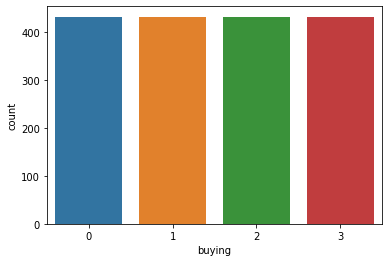

In [181]:
sns.countplot(x=df['buying'])


<AxesSubplot:xlabel='maint', ylabel='count'>

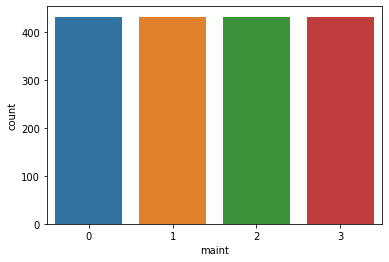

In [182]:
sns.countplot(x=df['maint'])


<AxesSubplot:xlabel='lug_boot', ylabel='count'>

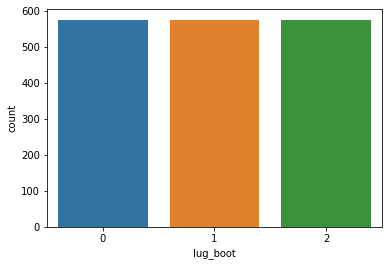

In [183]:
sns.countplot(x=df['lug_boot'])


<AxesSubplot:xlabel='safety', ylabel='count'>

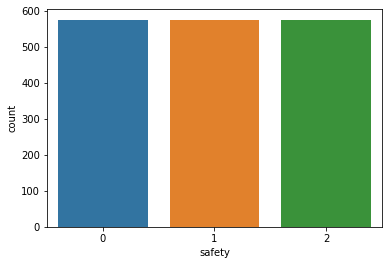

In [184]:
sns.countplot(x=df['safety'])


<AxesSubplot:xlabel='car_acc', ylabel='count'>

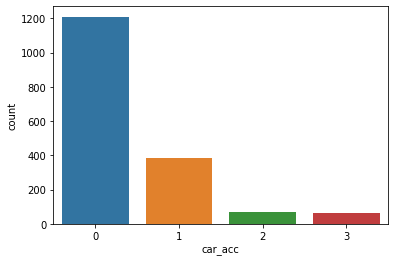

In [185]:
sns.countplot(x=df['car_acc'])


<AxesSubplot:xlabel='doors', ylabel='count'>

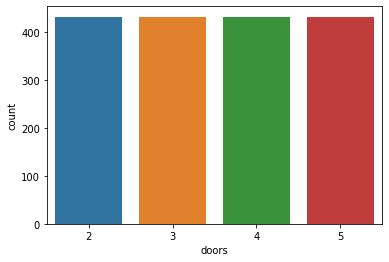

In [186]:
sns.countplot(x=df['doors'])


<AxesSubplot:xlabel='persons', ylabel='count'>

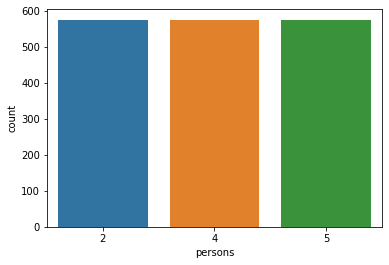

In [187]:
sns.countplot(x=df['persons'])


In [188]:
x=df.drop(['car_acc'],axis=1)
y=df['car_acc']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,stratify=y, test_size=0.3,random_state=42)

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [189]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [190]:
from sklearn.model_selection import cross_val_score


In [191]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [192]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.94      0.90      0.92       115
           2       0.89      0.76      0.82        21
           3       1.00      0.95      0.97        20

    accuracy                           0.96       519
   macro avg       0.95      0.90      0.92       519
weighted avg       0.96      0.96      0.96       519



In [194]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()  
  
model.fit(X_train,y_train)
  
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       363
           1       0.92      0.97      0.94       115
           2       1.00      0.76      0.86        21
           3       0.90      0.95      0.93        20

    accuracy                           0.97       519
   macro avg       0.95      0.92      0.93       519
weighted avg       0.97      0.97      0.97       519



In [196]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

model = AdaBoostClassifier(n_estimators=100, random_state=43)
model.fit(X_train,y_train)

y_pred = model.predict(X_train)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       363
           1       0.94      0.90      0.92       115
           2       0.89      0.76      0.82        21
           3       1.00      0.95      0.97        20

    accuracy                           0.96       519
   macro avg       0.95      0.90      0.92       519
weighted avg       0.96      0.96      0.96       519



In [197]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

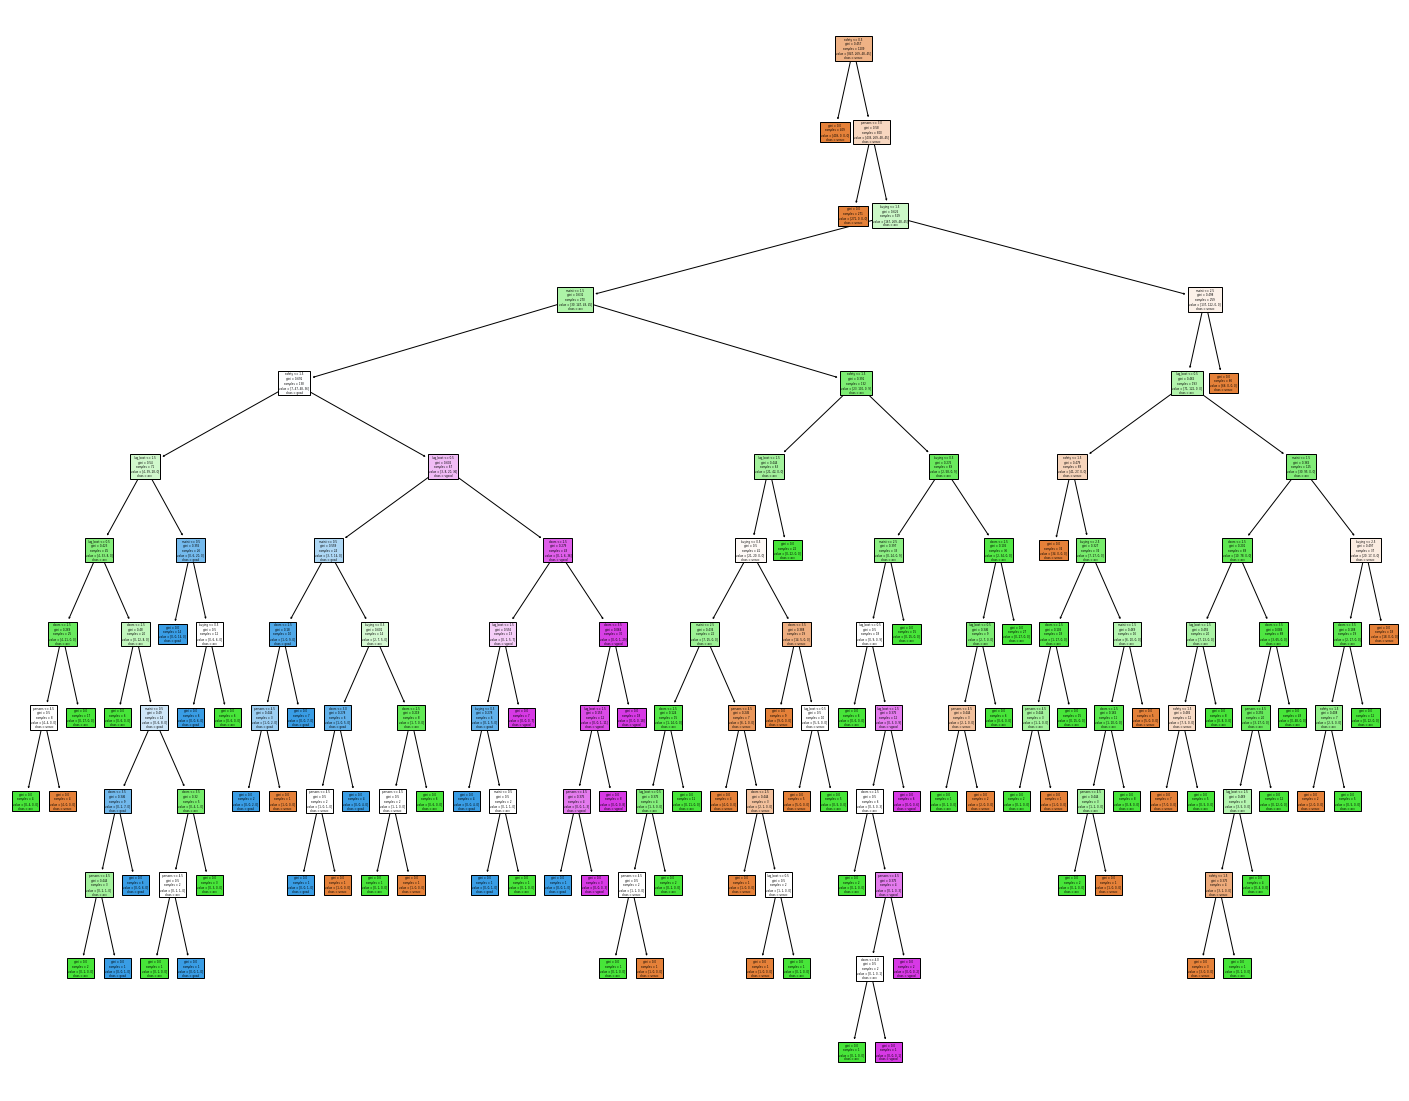

In [198]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,feature_names=x.columns,class_names=['unacc','acc','good','vgood'],
                   filled=True)

In [199]:
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)


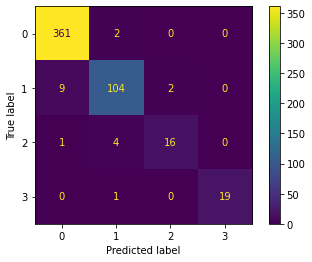

In [208]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()


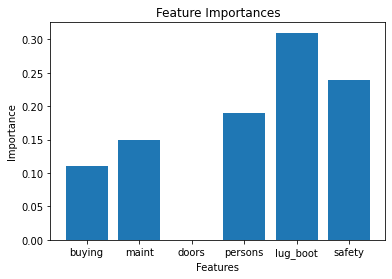

In [209]:
importances = model.feature_importances_

# Get feature names
feature_names = x.columns

# Plot feature importances
plt.bar(feature_names, importances)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()